# Rock Density Prediction

This project aims to predict the density of rocks based on the rebound signal strength

## Steps

* Libraries Importing I
* Data Importing 
* Data Wrangling
* Data Visualization
* Libraries Importing II
* Model Creation, Parameters' Tuning and Prediction

# Libraries Importing I

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Importing

In [2]:
rock_df = pd.read_csv("rock_density_xray.csv")

In [3]:
rock_df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


# Data Wrangling

In [4]:
rock_df.columns = ["Signal", "Density"]

In [5]:
rock_df.isnull().sum()

Signal     0
Density    0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Signal', ylabel='Density'>

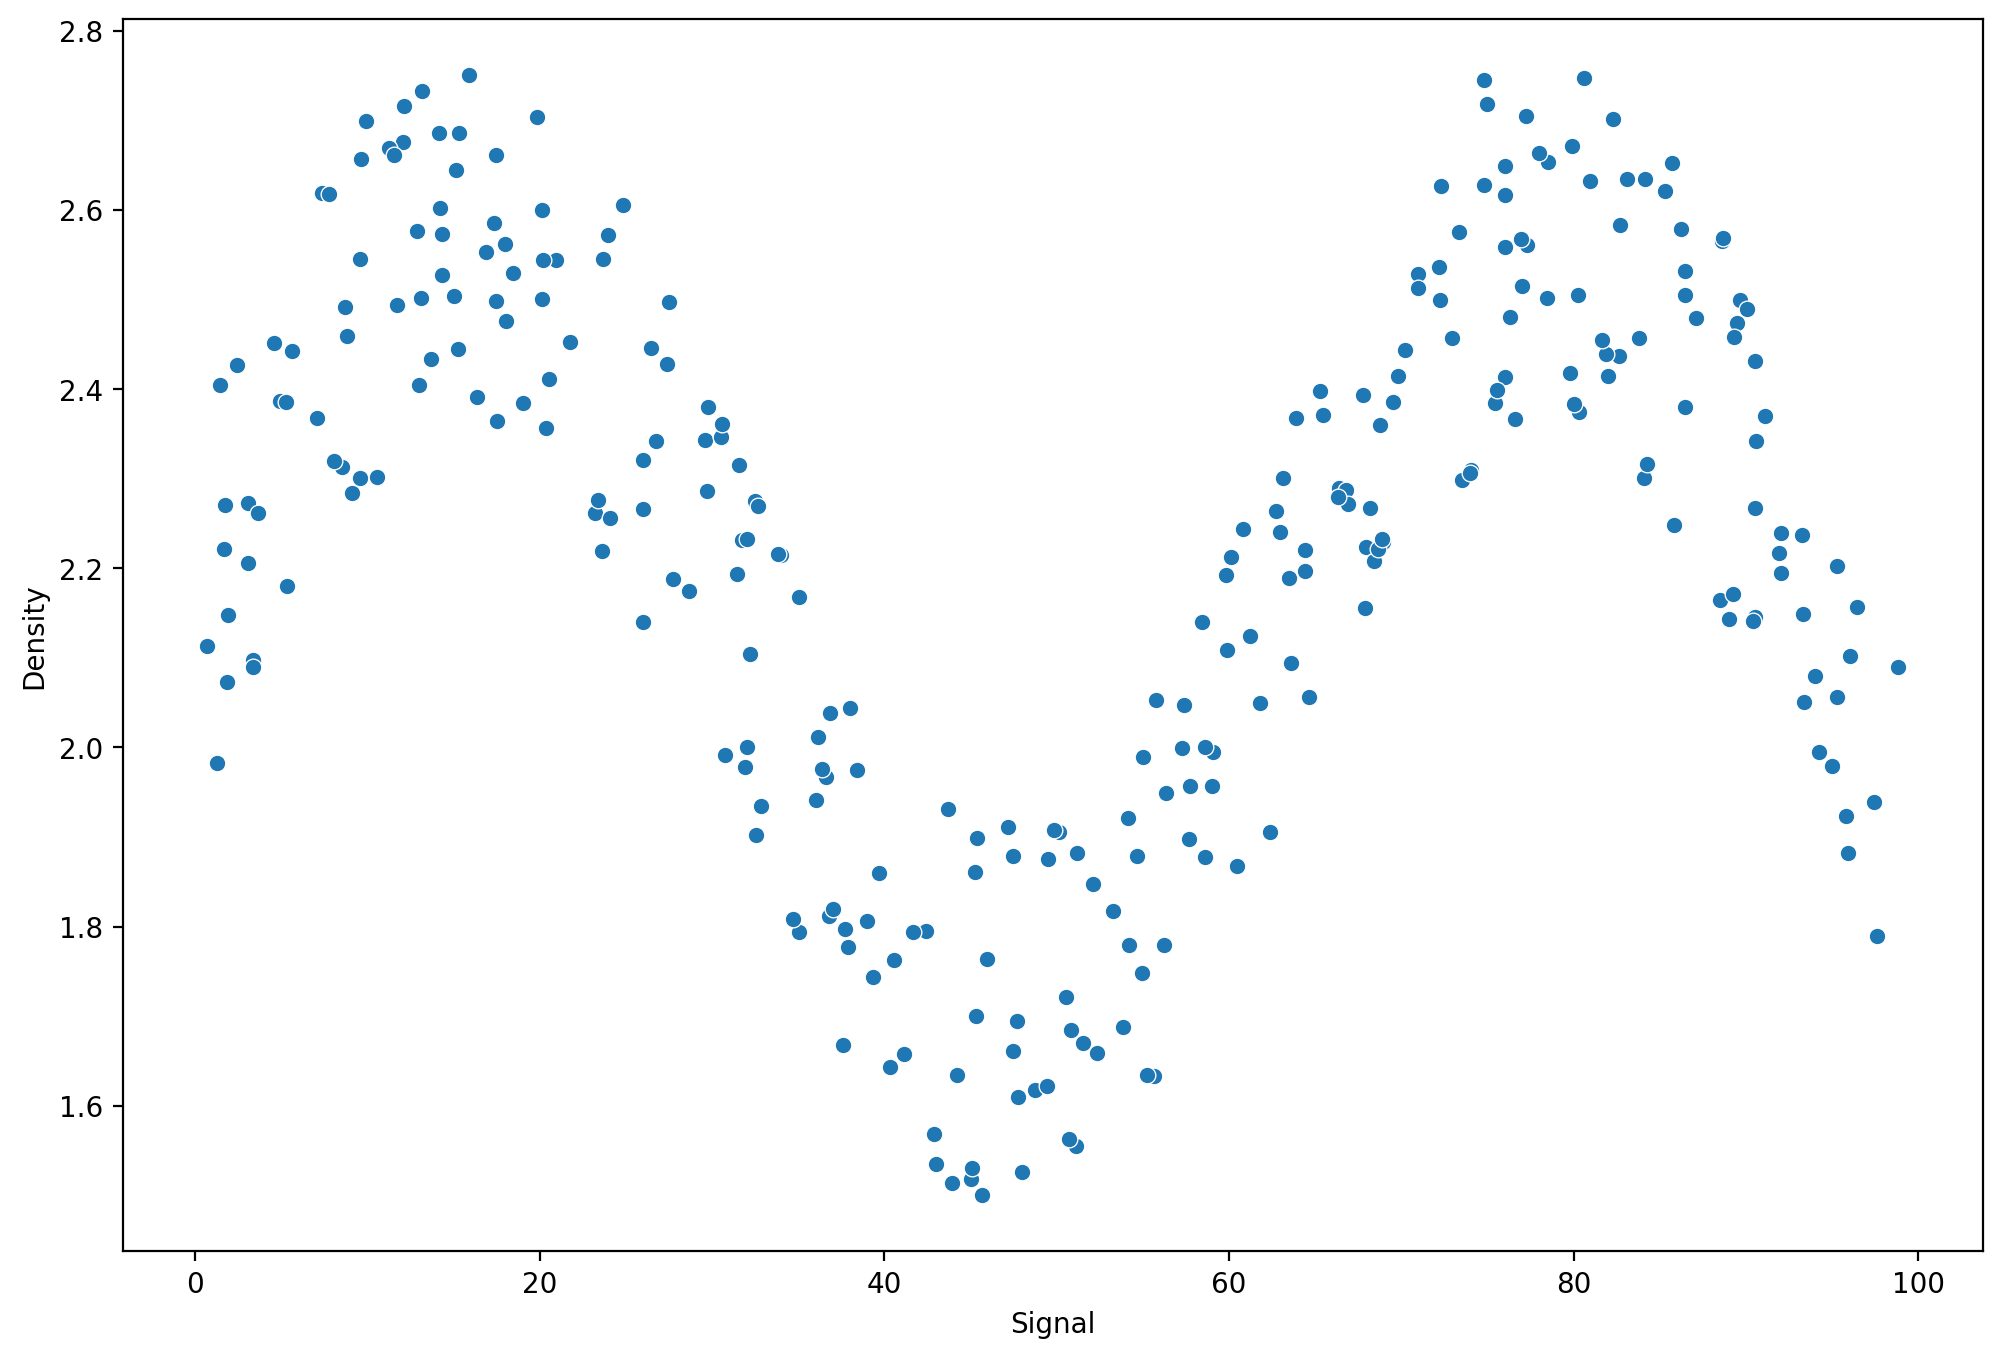

In [6]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=rock_df, x="Signal", y="Density")

# Libraries Importing II

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Model Creation, Parameters' Tuning and Prediction

In [9]:
X = rock_df["Signal"].values.reshape(-1, 1)
y = rock_df["Density"]

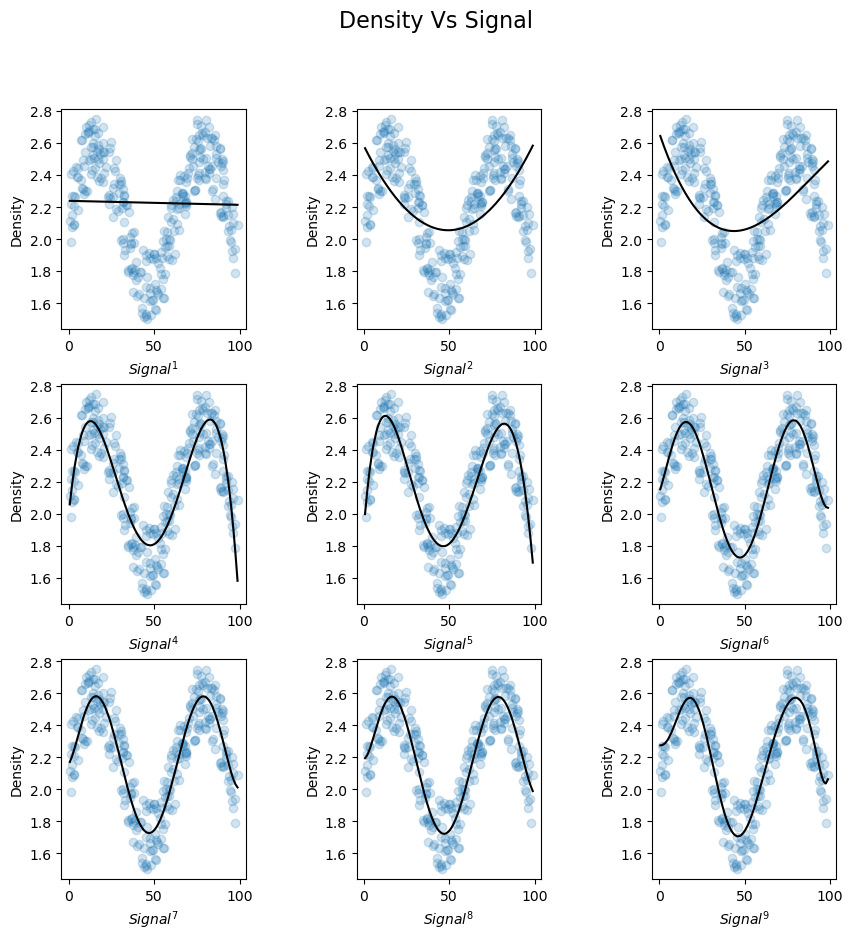

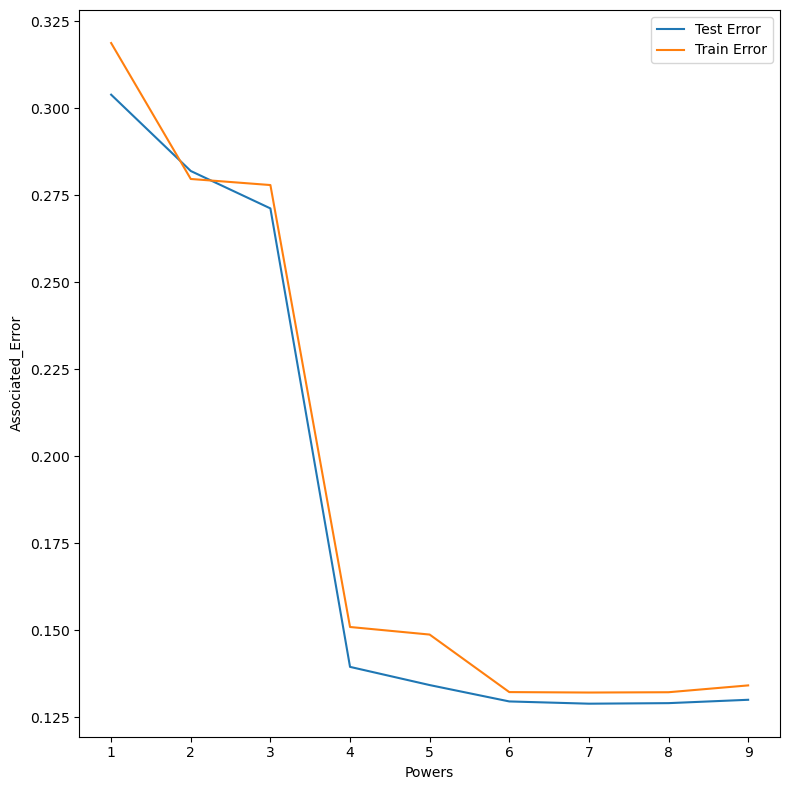

In [14]:
test_error_list = []
train_error_list = []
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10), dpi=100)

for i in range(1,10):
    #Converting the x to the polynomial form
    X_poly = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = X_poly.fit_transform(X)
    
    Xp_train, Xp_test, yp_train, yp_test = train_test_split(X_poly, y, test_size=0.33, random_state=5)
    
    #Fit the data to a linear regression line
    lr = LinearRegression()
    lr.fit(Xp_train,yp_train)
    y_pred_test = lr.predict(Xp_test)
    y_pred_train = lr.predict(Xp_train)
    
    
    test_error_list.append(np.sqrt(mean_squared_error(yp_test,y_pred_test)))
    train_error_list.append(np.sqrt(mean_squared_error(yp_train,y_pred_train)))

    
    #Getting the y value for all data points from the estimated expression
    y_pred = lr.predict(X_poly)

    
    #Grouping all X data points with predicted outcomes with zip and sorting it
    sorted_zip = sorted(zip(X,y_pred))
    
    #Unzipping the sorted pair
    x_poly, poly_pred = zip(*sorted_zip)

    
    i_floor = i//3
    i_rem = i%3
    
    if i_rem == 0:
        i_rem = 3
        i_floor -= 1
    
    
    #plottin each power level
    axes[i_floor][i_rem - 1].plot(x_poly,poly_pred, color="black")
    axes[i_floor][i_rem - 1].scatter(X,y,alpha=0.2)
    axes[i_floor][i_rem - 1].set_xlabel(f"$Signal^{i}$")
    axes[i_floor][i_rem - 1].set_ylabel("Density")
    axes[i_floor][i_rem - 1].set_xlim()


fig.suptitle("Density Vs Signal",fontsize=16)
fig.subplots_adjust(right=None,top=None,wspace=0.6,hspace=0.25)
    
    
    
#error_list

ranger = np.arange(1,10)

plt.figure(figsize=(8,8))
plt.plot(ranger,test_error_list, label="Test Error")
plt.plot(ranger,train_error_list, label="Train Error")
plt.xlabel("Powers")
plt.ylabel("Associated_Error")
plt.legend()
plt.tight_layout();


#error_list

It is seen from the test error plot that the reduction is significant till the power of 4 but above that the reduction is not significant and would result in overfitting. Then using a variant algorithm SVR, we have;

In [15]:
svr_model = SVR()

In [22]:
X_poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = X_poly.fit_transform(X)
lr = LinearRegression()

In [16]:
param_grid = {
    'C':[0.01,0.1,1,5,10,100,1000],
    'gamma':['auto','scale']
}

In [17]:
grid_model = GridSearchCV(svr_model, param_grid=param_grid)

In [18]:
def run_model(model, X_train, y_train, X_test, y_test):
    
    #Fitting the model
    model.fit(X_train, y_train)
    
    #Get Metrics
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'RMSE: {rmse}')
    
    #Plot results
    signal_range = np.arange(0, 100)
    output = model.predict(signal_range.reshape(-1, 1))
    
    plt.figure(figsize=(12, 8), dpi=200)
    sns.scatterplot(data=rock_df, x="Signal", y="Density", color="black")
    plt.plot(signal_range, output)

RMSE: 0.12646999302046696


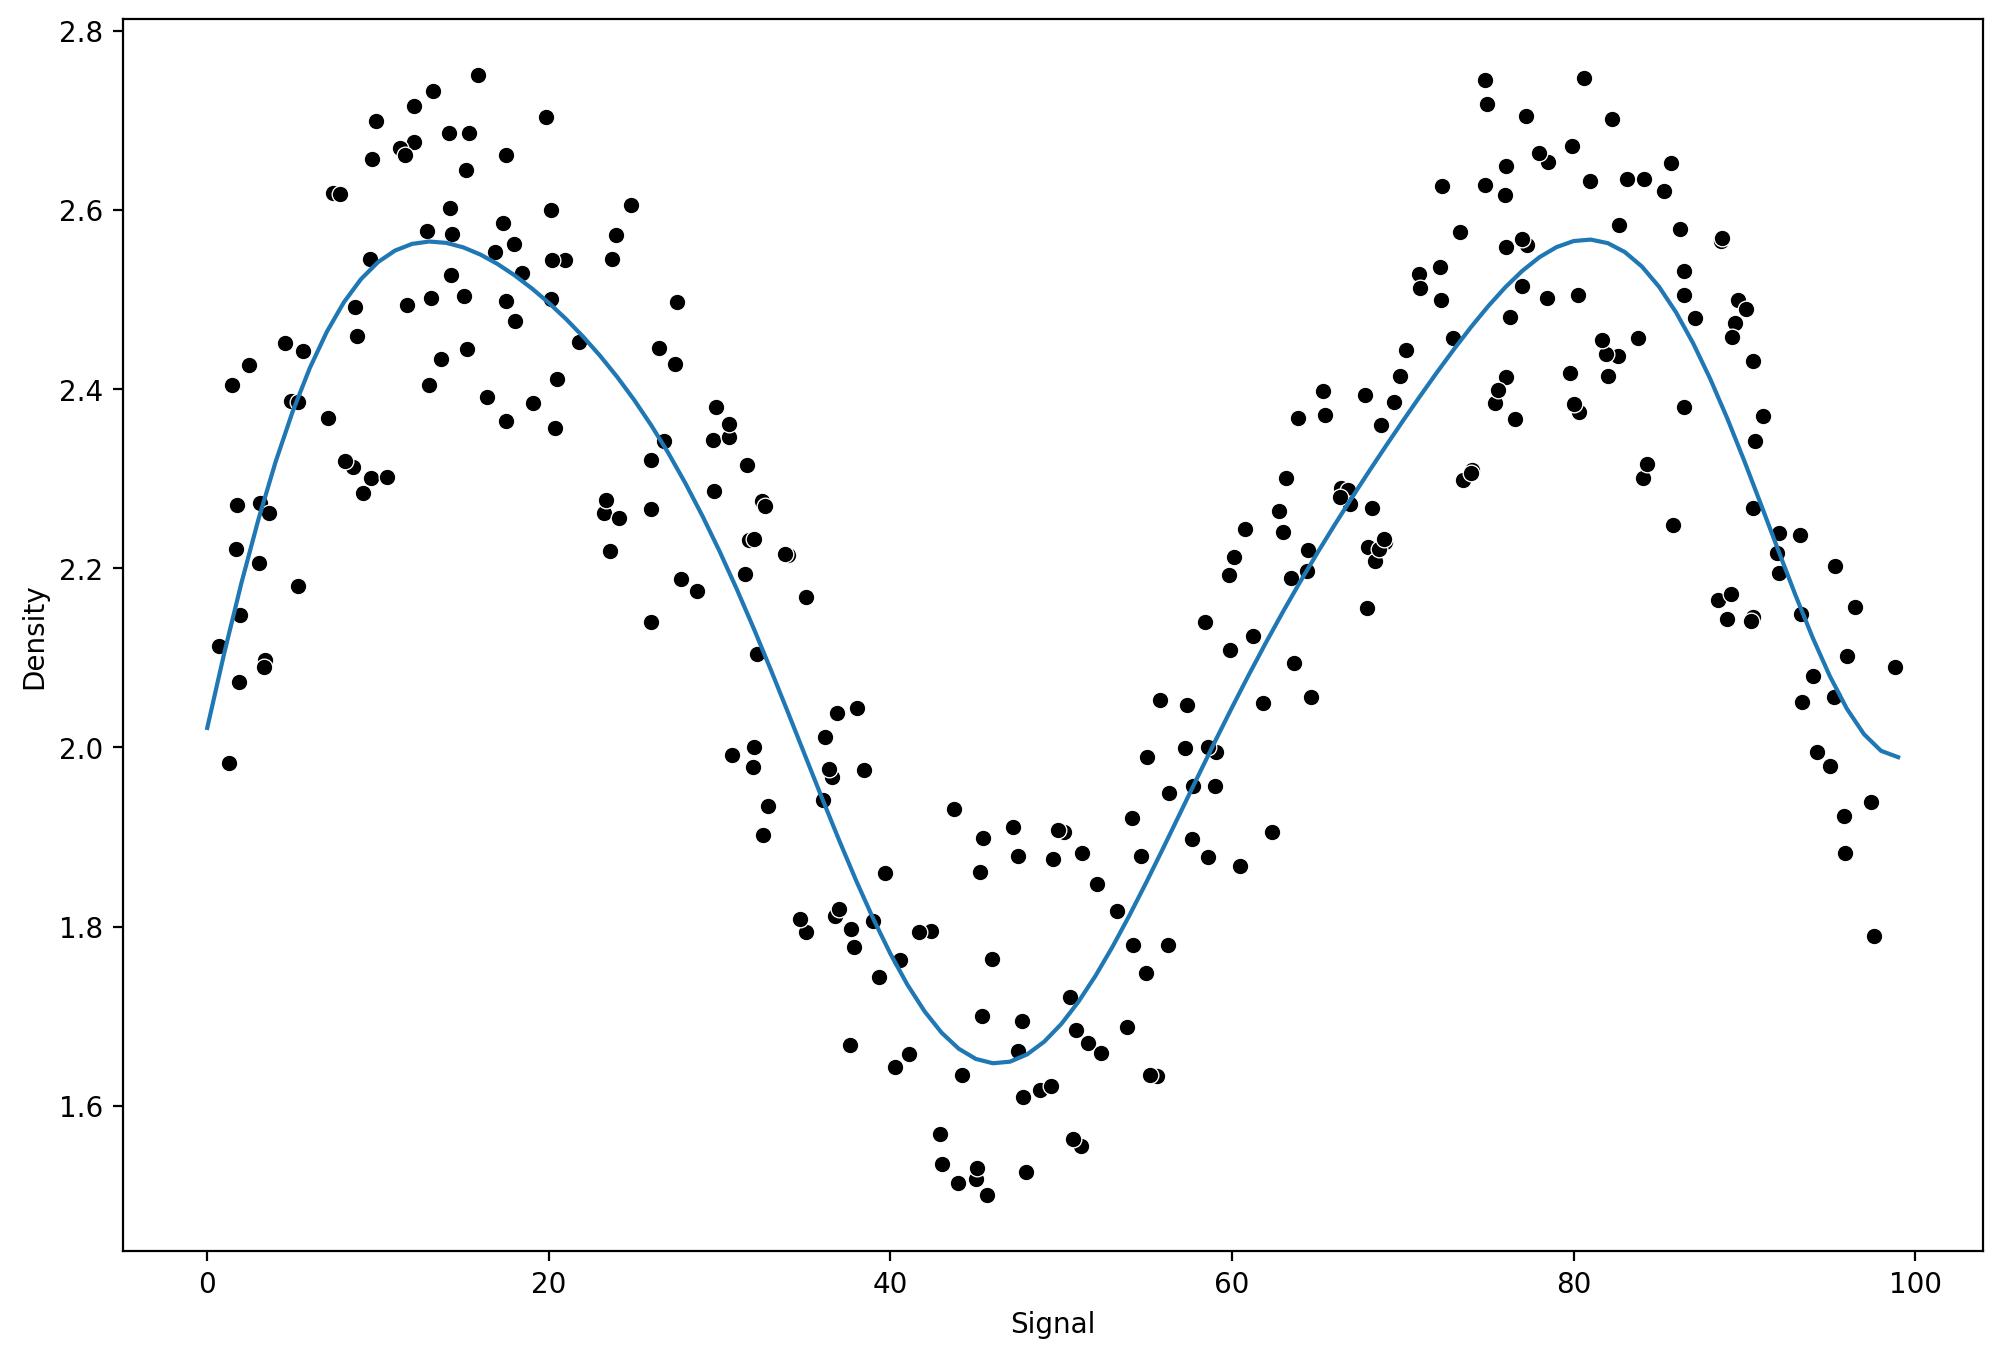

In [25]:
run_model(grid_model,X_train,y_train,X_test,y_test)

In [33]:
def run_output(model, X_train, y_train, X_test, y_test):
    
    #Fitting the model
    model.fit(X_train, y_train)
    
    #Get Metrics
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    
    #Plot results
    signal_range = np.arange(0, 100)
    output = model.predict(signal_range.reshape(-1, 1))
    
    return rmse

In [35]:
print("The test error of the SVR model is ", run_output(grid_model,X_train,y_train,X_test,y_test))
print("The test error of the Polynomial Regression is", test_error_list[3])

The test error of the SVR model is  0.12646999302046696
The test error of the Polynomial Regression is 0.13948664537134875
